In [1]:
import subprocess
import shlex
import pandas as pd
import numpy as np
from astropy.table import Table
from astropy.table import Column
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MultipleLocator
import glob
from matplotlib import pyplot
import matplotlib.gridspec as gridspec
import gc
import astropy
from scipy import interpolate

In [2]:
import pickle

In [429]:
import extinction

In [516]:
def Alam(lamin):
    
    A_v = 1 
    
    R_v = 3.1
    
    
    '''
    
    Add extinction with R_v = 3.1 and A_v = 1, A_v = 1 in order to find the constant of proportionality for
    
    the extinction law.
    
    '''
    
    
    flux = np.ones(len(lamin))
    
    redreturn = extinction.apply(extinction.ccm89(lamin, A_v, R_v), flux)
    #redreturn  =  A_v*extinction.a_lambda_cardelli_fast(lamin*1e-4,R_v)
    return redreturn

In [3]:
import glob

In [4]:
from astropy.time import Time

In [5]:
spectra_list = glob.glob("/home/xhall/Documents/NewZTF/spectra/*.ascii")

In [6]:
just_spectra_list = []
for k in spectra_list:
    just_spectra_list.append(k.split(r"/")[-1].split("_")[-2])

In [7]:
len(np.unique(just_spectra_list))

33

In [8]:
basedir = "/home/xhall/Documents/"
source = basedir + "NewZTF/sample_2020/SNIDoutput/"
output = basedir + "NewZTF/sample_2020/BTSoutput/"

sample200 = Table.from_pandas(pd.read_csv(basedir + "NewZTF/ML_sample_snid200.csv"))
ML_sample_snid_examples = Table.from_pandas(pd.read_csv(basedir + "NewZTF/ML_sample_snid_brightexamples.csv"))
sample_2018 = Table.from_pandas(pd.read_csv(basedir + "NewZTF/sample_2018/ML_sample_snid_norepeat_2018.csv"))
sample_2020 = Table.from_pandas(pd.read_csv("/home/xhall/Documents/NewZTF/sample_2020/SNID_2020_output.csv"))
sample_remaining = Table.from_pandas(pd.read_csv("/home/xhall/Documents/ZTFI/SNID_2020_remaining_output.csv"))

In [9]:
phase_data = Table.from_pandas(pd.read_csv("/home/xhall/Documents/ZTFI/phase.csv"))

In [434]:
superfit_results = Table.from_pandas(pd.read_csv("/home/xhall/Documents/Superfit/superfit_classes.csv"))

In [435]:
a_file = open("/home/xhall/Documents/Superfit/short_path_dict.pkl", "rb")
short_path_dict = pickle.load(a_file)

In [436]:
short_path_dict[superfit_results[0]["Match"]]

'1999em_1999-11-08_00-00-00_Keck1_LRIS_SUSPECT.dat'

In [437]:
joined_table = astropy.table.join(sample_2020, superfit_results)

In [450]:
np.where(joined_table["ZTF_Name"] == "ZTF18aaqpjja")

(array([383]),)

In [451]:
i = joined_table[383]

In [452]:
sn_path = "/home/xhall/Documents/Superfit/bank/binnings/10A/sne/" + i["Match"][0:i["Match"].rfind("/")] + "/" + short_path_dict[i["Match"]]

In [453]:
gal_path = basedir + "Superfit/" +i["Gal"][i["Gal"].rfind("bank")::]

In [454]:
nova = np.loadtxt(sn_path)
host = np.loadtxt(gal_path)
nova[:,1]=nova[:,1]/np.nanmedian(nova[:,1])
host[:,1]=host[:,1]/np.nanmedian(host[:,1])

In [519]:
nova[:,1] = nova[:,1]*10**(-0.4 * i["Av"] * Alam(nova[:,0]))

In [520]:
lam = np.linspace(max(np.min(host[:,0]),np.min(nova[:,0])),min(np.max(host[:,0]),np.max(nova[:,0])), 10000)

In [521]:
nova_int = interpolate.interp1d(nova[:,0] , nova[:,1] ,   bounds_error=False, fill_value='nan')

host_int = interpolate.interp1d(host[:,0], host[:,1],   bounds_error=False, fill_value='nan')

host_nova = i["Frac(SN)"]*nova_int(lam) + i["Frac(gal)"]*host_int(lam)

In [522]:
spectra_name = i["Version"].split(".")[0]
z_snid = i["z_snid"]

In [523]:
source_folder = source + spectra_name
files = np.sort(glob.glob(source_folder+"/*.dat"))

In [524]:
files = np.sort(files)
matches_files = files[0:len(files)-1]
spectra = Table.read(files[-1], format = "ascii", names = ["wavelength", "flux"])

In [525]:
spectra = Table.read(files[-1], format = "ascii", names = ["wavelength", "flux"])

In [526]:
match = Table.read(files[0], format = "ascii", names = ["redshifted_wavelength", "flux"])

In [527]:
data = Table.read("/home/xhall/Documents/NewZTF/spectra_nonan/" + i["Version"], format = "ascii")

In [528]:
file = open("/home/xhall/Documents/NewZTF/spectra/" + i["Version"], "r")

In [529]:
"/home/xhall/Documents/NewZTF/spectra/" + i["Version"]

'/home/xhall/Documents/NewZTF/spectra/ZTF18aaqpjja_20180522_P200_v1.ascii'

In [530]:
file_lines = file.readlines()

In [531]:
time = 0
for j in file_lines:
    if("UTC" in j):
        time = j

In [532]:
i

Version,ZTF_Name,z_sntemplate,z_rlap,z_snid,z_snid_err,z_level,rank_1,sntemplate_1,rlap_1,c_snid_1,z_snid_1,z_snid_err_1,age_1,age_flag_1,rank_2,sntemplate_2,rlap_2,c_snid_2,z_snid_2,z_snid_err_2,age_2,age_flag_2,rank_3,sntemplate_3,rlap_3,c_snid_3,z_snid_3,z_snid_err_3,age_3,age_flag_3,rank_4,sntemplate_4,rlap_4,c_snid_4,z_snid_4,z_snid_err_4,age_4,age_flag_4,rank_5,sntemplate_5,rlap_5,c_snid_5,z_snid_5,z_snid_err_5,age_5,age_flag_5,Resolution,Superfit_c,Superfit_z,Match,Gal,Frac(SN),Frac(gal),Phase,Av
str39,str12,str12,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,str36,str18,float64,str60,str80,float64,float64,float64,float64
ZTF18aaqpjja_20180522_P200_v1.ascii,ZTF18aaqpjja,sn2005eu,22.04,0.0593,0.0024,1,1,sn2005eu,22.04,Ia-norm,0.0593,0.0024,8.3,0,2,sn2008Z,18.59,Ia-norm,0.0601,0.0028,7.6,0,3,sn06cz,17.47,Ia-norm,0.0688,0.0036,1.12,0,14,sn1999ac,13.4,Ia-91T,0.0595,0.0045,0.4,0,44,sn06gz,10.4,Ia-03fg,0.0588,0.0042,6.3,0,ZTF18aaqpjja_20180522_P200_v1_10,Ia-norm,0.059241999999999996,Ia-norm/2012cg/KAST+2012-06-13 05:25:26.00,/mnt/c/Users/20xha/Documents/Caltech/Research/superfit/bank/binnings/10A/gal/SB4,0.43078545,0.5692145000000001,-2456056.0,2.0


In [533]:
"/home/xhall/Documents/NewZTF/spectra/" + i["Version"]

'/home/xhall/Documents/NewZTF/spectra/ZTF18aaqpjja_20180522_P200_v1.ascii'

In [534]:
phase_data[np.where(phase_data["ZTFID"] == i["ZTF_Name"])]["peakt"] + 2458000

2458247.72


In [565]:
i["Version"].split("_")[-2]

'P200'

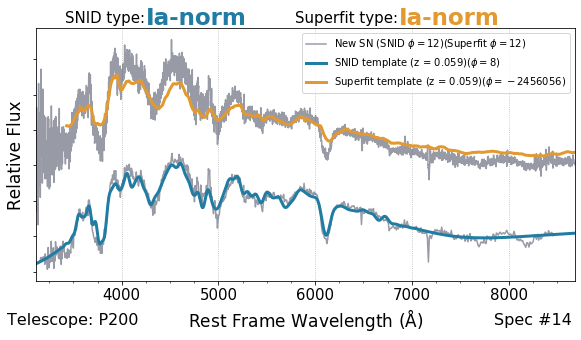

In [573]:
num = 1
low, high = 5300, 5700

x, y = spectra["wavelength"] / (1 + i["z_snid_1"]), spectra["flux"]
xs, ys = data["col1"] / (1 + i["Superfit_z"]), data["col2"]
xi, yi = match["redshifted_wavelength"] / (1 + i["z_snid_1"]), match["flux"]
xsi, ysi = lam, host_nova
ysi = ysi/np.median(ysi[np.where((xsi < high) & (xsi > low))])

#ext = extinction.fm07(xs, i["Av"])
#ys = ys / ext
ys = ys/np.median(ys[np.where((xs < high) & (xs > low))])


min_overlap = max(np.min(xsi), np.min(xi))
max_overlap = min(np.max(xsi), np.max(xi))
interp_grid = np.linspace(min_overlap, max_overlap, 10000)
snid_interp = interpolate.interp1d(xi, yi)
supy_interp = interpolate.interp1d(xsi, ysi)
sep_t = np.max(np.abs((supy_interp(interp_grid)) - (snid_interp(interp_grid))))

min_overlap_d = max(np.min(x), np.min(xs))
max_overlap_d = min(np.max(x), np.max(xs))
interp_grid_d = np.linspace(min_overlap_d, max_overlap_d, 10000)
snid_interp_d = interpolate.interp1d(x, y)
supy_interp_d = interpolate.interp1d(xs, ys)
sep_d = np.max(np.abs((supy_interp_d(interp_grid_d)) - (snid_interp_d(interp_grid_d))))

sep = max(sep_d, sep_t)/1.8

t_max = phase_data[np.where(phase_data["ZTFID"] == i["ZTF_Name"])]["peakt"] + 2458000

date_obs = i["Version"].split("_")[1]
astropy_t_obs = Time(date_obs[0:4] + "-" + date_obs[4:6] + "-" + date_obs[6::])
t_obs = astropy_t_obs.jd
phase_obs_snid = (t_obs-t_max)/(1 + i["z_snid_1"])
phase_obs_superfit = (t_obs-t_max)/(1 + i["Superfit_z"])

fig, ax = plt.subplots(figsize=(8,4.5))

ax.plot(xs,ys + sep,color='#32384D',label='New SN (SNID $\phi = {:.0f}$)(Superfit $\phi = {:.0f}$)'.format(phase_obs_snid[0], phase_obs_superfit[0]),alpha=0.5)
ax.plot(x,y- sep,color='#32384D' ,alpha=0.5)
ax.plot(xi,yi - sep,color='#217CA3',label='SNID template (z = {:.3f})($\phi = {:.0f}$)'.format(i["z_snid_1"], i["age_1"]), lw=3)
ax.plot(xsi,ysi + sep,color='#E29930',label='Superfit template (z = {:.3f})($\phi = {:.0f}$)'.format(i["Superfit_z"], i["Phase"]), lw=3)

ax.plot(x[-3],y[-3],color='#217CA3', lw=3)
ax.set_xlabel(r'Rest Frame Wavelength ($\mathrm{\AA}$)', fontsize=17)
ax.set_ylabel('Relative Flux', fontsize=17)
ax.tick_params(which='both',labelsize=15)

ax.grid(axis='x', color='0.7', ls=':')
ax.xaxis.set_minor_locator(MultipleLocator(250))
ax.set_yticklabels([])

ax.text(0.505, 0.955, 'Superfit type: ',
        va='center',
        fontsize=15, transform=plt.gcf().transFigure)
ax.text(0.685, 0.955, i["Superfit_c"],
        color='#E29930', weight='bold', va='center',
        fontsize=23, transform=plt.gcf().transFigure)

ax.text(0.105, 0.955, 'SNID type: ',
        va='center',
        fontsize=15, transform=plt.gcf().transFigure)
ax.text(0.245, 0.955, i["c_snid_1"],
        color='#217CA3', weight='bold', va='center',
        fontsize=23, transform=plt.gcf().transFigure)

ax.text(0.850, 0.025, "Spec #" + str(14),
        va='center',
        fontsize=16, transform=plt.gcf().transFigure)

telescope = i["Version"].split("_")[-2]

ax.text(0.005, 0.025, "Telescope: " + telescope,
        va='center',
        fontsize=16, transform=plt.gcf().transFigure)

ax.set_xlim(min(np.min(x),np.min(xs)),max(np.max(x),np.max(xs)))

ax.legend(fancybox=True)
fig.subplots_adjust(left=0.055,right=0.99,top=0.925,bottom=0.145)

In [514]:
np.max(supy_interp(interp_grid))

1.4899294919071149

In [427]:
np.max(np.abs((supy_interp(interp_grid)) - (snid_interp(interp_grid))))

0.855533852535074

In [442]:
ext = extinction.fm07(xi, i["Av"])

In [336]:
i["Phase"]

-2449449.0

In [304]:
sep_t

0.17984083737379528

In [337]:
superfit_results["Phase"] + 2450000

-1482.0
-6669.0
-5468.0
-5466.0
-5466.0
-5468.0
-5466.0
--
-7600.0
-2317.0
-6630.0


In [477]:
joined_table["Phase"]

-2451482.0
-2456669.0
-2455468.0
-2455468.0
-2455466.0
-2455466.0
-2455466.0
--
-2457600.0
-2452317.0
-2456630.0
